In [1]:
from clifford.g3c import *

In [2]:
point = up(2*e1+e2)
line = up(3*e1 + 2*e2) ^ up(3*e1 - 2*e2) ^ einf
circle = up(e1) ^ up(-e1 + 1.6*e2 + 1.2*e3) ^ up(-e1 - 1.6*e2 - 1.2*e3)
sphere = up(3*e1) ^ up(e1) ^ up(2*e1 + e2) ^ up(2*e1 + e3)

In [3]:
# note that due to floating point rounding, we need to truncate back to a single grade here, with ``(grade)``
point_refl = homo((circle * point.gradeInvol() * ~circle)(1))
line_refl = (circle * line.gradeInvol() * ~circle)(3)
sphere_refl = (circle * sphere.gradeInvol() * ~circle)(4)

In [5]:
from matplotlib import pyplot as plt
plt.ioff()  # we'll ask for plotting when we want it

# if you're editing this locally, you'll get an interactive UI if you uncomment the following
#
#    %matplotlib notebook

from mpl_toolkits.clifford import plot
import mpl_toolkits.clifford; mpl_toolkits.clifford.__version__

'0.0.3'

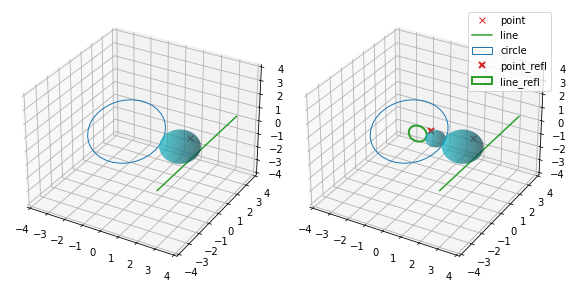

In [6]:
# standard matplotlib stuff - construct empty plots side-by-side, and set the scaling
fig, (ax_before, ax_both) = plt.subplots(1, 2, subplot_kw=dict(projection='3d'), figsize=(8, 4))
ax_before.set(xlim=[-4, 4], ylim=[-4, 4], zlim=[-4, 4])
ax_both.set(xlim=[-4, 4], ylim=[-4, 4], zlim=[-4, 4])

# plot the objects before reflection on both plots
for ax in (ax_before, ax_both):
    plot(ax, [point], color='tab:red', label='point', marker='x', linestyle=' ')
    plot(ax, [line], color='tab:green', label='line')
    plot(ax, [circle], color='tab:blue', label='circle')
    plot(ax, [sphere], color='tab:cyan')  # labels do not work for spheres: pygae/mpl_toolkits.clifford#5

# plot the objects after reflection
plot(ax_both, [point_refl], color='tab:red', label='point_refl', marker='x', linestyle=' ', markeredgewidth=2)
plot(ax_both, [line_refl.normal()], color='tab:green', label='line_refl', linewidth=2)
plot(ax_both, [sphere_refl], color='tab:cyan')

fig.tight_layout()
ax_both.legend()

# show the figure
fig